In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
search=pd.read_csv("datasets\searches.tsv",sep = "\t")
search.head(2)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN


In [3]:
contact= pd.read_csv("datasets\contacts.tsv",sep = "\t")
contact.head(2)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10


In [4]:
contact.isnull().sum()/len(contact)*100

id_guest           0.000000
id_host            0.000000
id_listing         0.000000
ts_contact_at      0.000000
ts_reply_at        7.720823
ts_accepted_at    53.636712
ts_booking_at     72.210150
ds_checkin         0.000000
ds_checkout        0.000000
n_guests           0.000000
n_messages         0.000000
dtype: float64

In [5]:
search.isnull().sum()/len(search)*100

ds                       0.000000
id_user                  0.000000
ds_checkin              33.156113
ds_checkout             33.156113
n_searches               0.000000
n_nights                33.156113
n_guests_min             0.000000
n_guests_max             0.000000
origin_country           0.000000
filter_price_min        62.722109
filter_price_max        62.722109
filter_room_types       54.694015
filter_neighborhoods    96.233595
dtype: float64

In [12]:
# Neighborhoods columns contain 96 % of null values, So we can drop column based on high null values
search.drop(columns = ['filter_neighborhoods'],inplace = True)

In [13]:
contact.dtypes

id_guest          object
id_host           object
id_listing        object
ts_contact_at     object
ts_reply_at       object
ts_accepted_at    object
ts_booking_at     object
ds_checkin        object
ds_checkout       object
n_guests           int64
n_messages         int64
dtype: object

In [14]:
search.dtypes

ds                   datetime64[ns]
id_user                      object
ds_checkin           datetime64[ns]
ds_checkout          datetime64[ns]
n_searches                    int64
n_nights                    float64
n_guests_min                  int64
n_guests_max                  int64
origin_country               object
filter_price_min            float64
filter_price_max            float64
filter_room_types            object
dtype: object

In [9]:
# Changing ds,ds_checkout,ds_checkin columns to datetime column
search['ds'] = pd.to_datetime(search['ds'])


In [10]:
search['ds_checkin'] = pd.to_datetime(search["ds_checkin"])
search['ds_checkout'] = pd.to_datetime(search["ds_checkout"])

In [11]:
search.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09


In [15]:
search['ds'].value_counts()

2014-10-14    3011
2014-10-13    2973
2014-10-06    2758
2014-10-12    2716
2014-10-01    2628
2014-10-02    2627
2014-10-05    2612
2014-10-07    2606
2014-10-08    2584
2014-10-09    2430
2014-10-03    2363
2014-10-04    2226
2014-10-11    2122
2014-10-10    2081
Name: ds, dtype: int64

<Axes: >

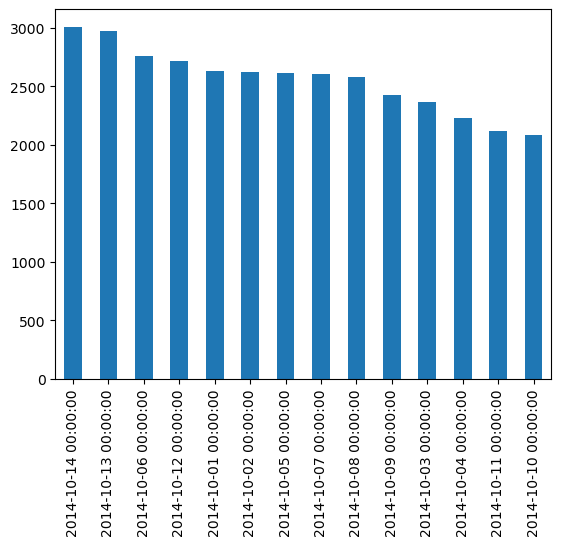

In [17]:
search['ds'].value_counts().plot(kind = 'bar')
